In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
%matplotlib inline  

In [2]:
x_new=np.linspace(0,20).reshape(50,1)

In [3]:
ones = np.ones((50,1))
X = np.concatenate((ones, x_new), axis=1)
y=x_new*-2 + 1

In [4]:
X.shape, y.shape

((50, 2), (50, 1))

In [5]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [6]:
compute_cost(X,y)

array([249.8877551])

In [7]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),alpha=0.01, num_iterations=50):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,[0]].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,[1]].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [8]:
%%time
num_iterations=40
theta_init=np.array([[0],[0]])
alpha=0.001
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

Wall time: 16.6 ms


In [9]:
theta

array([[-0.13037674],
       [-1.91021101]])

In [10]:
from sklearn.metrics import r2_score
r2_score(y, X@theta )

0.9975950054190024

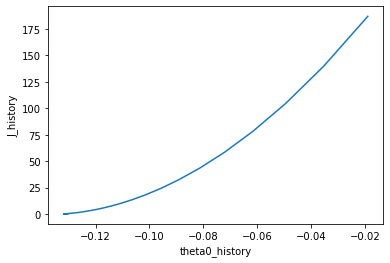

In [16]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

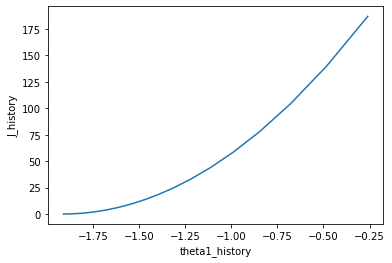

In [17]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

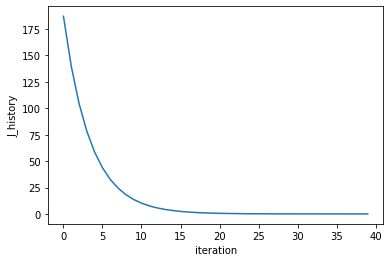

In [18]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )


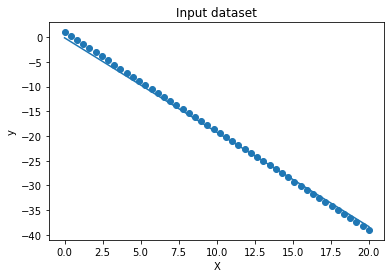

In [19]:
plt.scatter(x= X[:,[1]] , y=y )
plt.plot( X[:,[1]] , theta[1]* X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

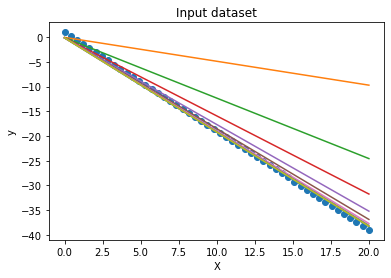

In [20]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , X@theta )
for i in range(1, 40 ,5):
    plt.plot( X[:,1] , theta1_history[i]*X[:,1]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [21]:
#mini batch

In [22]:
#with shuffle
d=np.c_[ X, y ]
np.random.shuffle(d)
X=d[:,:2]
y=d[:,[2]]

In [23]:
def gradientt_descent(X, y, theta=np.array([[0],[0]]),alpha=0.01, num_iterations=50 , number=5):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    m=m//number
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        for i in range(number):
            if  i != (m-1) :
                error =  np.dot( X[i*10:(i+1)*10,:] , theta ) - y[i*10:(i+1)*10,:]
                term0 = (alpha/m) * sum(error* X[i*10:(i+1)*10,0].reshape(10,1))
                term1 = (alpha/m) * sum(error* X[i*10:(i+1)*10,1].reshape(10,1))
        
                # update theta
                term_vector = np.array([[term0],[term1]])
                #print(term_vector)
                theta = theta - term_vector.reshape(2,1)
        
                # store history values
                theta0_history.append(theta[0][0])
                theta1_history.append(theta[1][0])
                J_history.append(compute_cost(X,y,theta)[0])
            else:
                error =  np.dot( X[i*10:,:] , theta ) - y[i*10:,:]
                term0 = (alpha/m) * sum(error* X[i*10:,0].reshape(10,1))
                term1 = (alpha/m) * sum(error* X[i*10:,1].reshape(10,1))
        
                # update theta
                term_vector = np.array([[term0],[term1]])
                #print(term_vector)
                theta = theta - term_vector.reshape(2,1)
        
                # store history values
                theta0_history.append(theta[0][0])
                theta1_history.append(theta[1][0])
                J_history.append(compute_cost(X,y,theta)[0])
                
               
        
    return (theta, J_history, theta0_history, theta1_history)

In [24]:
%%time
num_iterations=10
theta_init=np.array([[0],[0]])
alpha=0.001
theta, J_history, theta0_history, theta1_history = gradientt_descent(X,y, theta_init, alpha, num_iterations)

Wall time: 12.1 ms


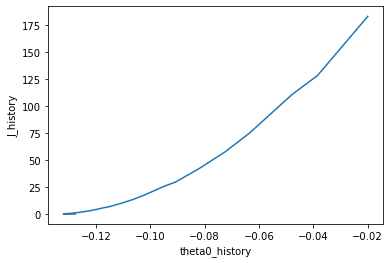

In [25]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

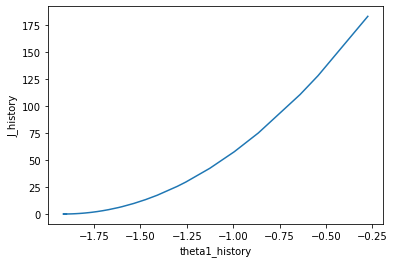

In [27]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

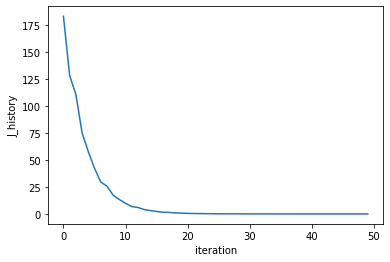

In [28]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

In [29]:
X[:,[1]].shape ,y.shape

((50, 1), (50, 1))

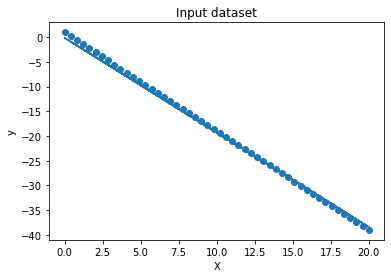

In [30]:
plt.scatter(x= X[:,[1]] , y=y )
plt.plot( X[:,[1]] , theta[1]* X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

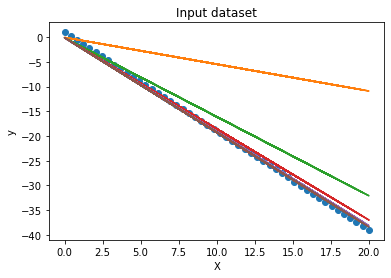

In [31]:
plt.scatter(x= X[:,[1]] , y=y)
plt.plot( X[:,[1]] , theta[1]* X[:,1]+theta[0] )
for i in range(1, 50 ,10):
    plt.plot( X[:,[1]] , theta1_history[i]*X[:,[1]]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [32]:
#stochastic gradient descent 

In [33]:
def gradienttt_descent(X, y, theta=np.array([[0],[0]]),alpha=0.01, num_iterations=50 ):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        for i in range(m):

                theta = theta -  alpha* ((X[i,:]@theta)-y[i]) *(X[i,:].T).reshape(2,1)
                theta0_history.append(theta[0][0])
                theta1_history.append(theta[1][0])
                J_history.append(compute_cost(X,y,theta)[0])
            
               
        
    return (theta, J_history, theta0_history, theta1_history)

In [34]:
%%time
num_iterations=10
theta_init=np.array([[0],[0]])
alpha=0.001
theta, J_history, theta0_history, theta1_history = gradienttt_descent(X,y, theta_init, alpha, num_iterations)

Wall time: 67.3 ms


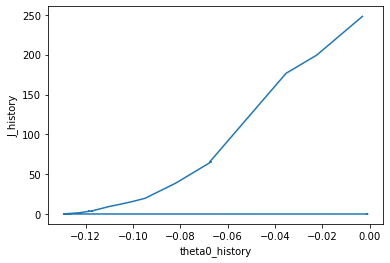

In [35]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

In [36]:
theta0_history

[-0.003081632653061225,
 -0.022422540344584314,
 -0.03533103221398329,
 -0.0675283166500818,
 -0.0668956634931144,
 -0.08192304847412511,
 -0.0948774868998784,
 -0.10063696853730553,
 -0.10546324684655248,
 -0.11015527089602331,
 -0.11737759125350357,
 -0.11704634135871946,
 -0.11868769530556465,
 -0.11844827794980568,
 -0.12274306752591921,
 -0.12447400685345518,
 -0.12663545571707188,
 -0.12645506659872366,
 -0.12796305049586526,
 -0.12933634172468392,
 -0.1284278535825778,
 -0.12796923520595524,
 -0.12877023254963768,
 -0.1277458567503926,
 -0.12766888155437958,
 -0.12712195778456442,
 -0.1278777408410191,
 -0.12724376697850565,
 -0.12757947376648696,
 -0.1272819135781143,
 -0.12694931006304916,
 -0.12653011637790312,
 -0.12746485363861954,
 -0.12715283735078484,
 -0.1280601722260894,
 -0.12815931957147092,
 -0.12796896724421541,
 -0.12851412638538978,
 -0.12817809315548212,
 -0.12887533497489914,
 -0.1280305149187661,
 -0.12716511160337274,
 -0.12654767334849668,
 -0.12552769990471

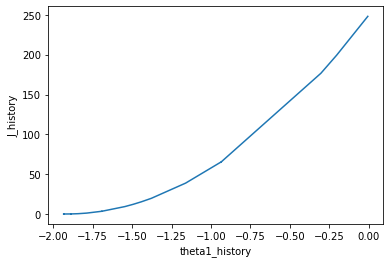

In [37]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

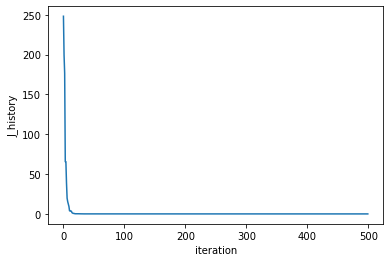

In [38]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

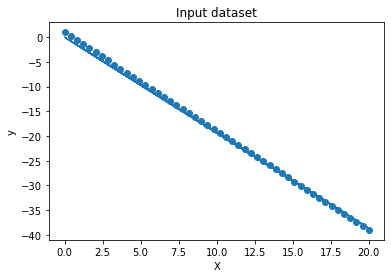

In [39]:
plt.scatter(x= X[:,[1]] , y=y )
plt.plot( X[:,[1]] , theta[1]* X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

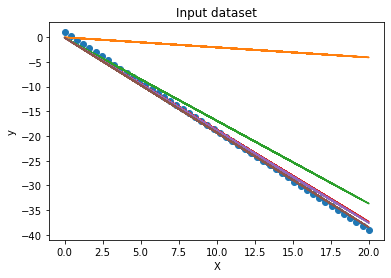

In [40]:
plt.scatter(x= X[:,[1]] , y=y)
plt.plot( X[:,[1]] , theta[1]* X[:,1]+theta[0] )
for i in range(1, 50 ,10):
    plt.plot( X[:,[1]] , theta1_history[i]*X[:,[1]]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');